<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Big Data II - Armazenamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno: Raul Pichinin

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Orientação a coluna;</li>
  <li>Particionamento.</li>
</ol>

---

# **Exercícios**

## 1\. Particionamento e orientação a coluna.

Replique as atividades da aula 3 em sua conta da AWS.

1.1. Faça o download do arquivo `crime.csv` (fonte [Kaggle](https://www.kaggle.com/yamqwe/chicago-crimee?select=chicago_crime_2014.csv)).

In [ ]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

1.2. Leia os dados em um DataFrame Pandas e crie a coluna `reference_date`.

In [ ]:
import pandas as pd

filename = './crime'
df = pd.read_csv(f'./{filename}.csv')

In [ ]:
df.head(3)

index       ID Case Number                    Date                Block  \
0      0  9446824    HX100141  01/01/2014 02:00:00 AM  0000X W ILLINOIS ST   
1      1  9446748    HX100020  01/01/2014 12:00:00 AM  006XX N DEARBORN ST   
2      2  9446758    HX100030  01/01/2014 12:30:00 AM     052XX W RACE AVE   

   IUCR     Primary Type    Description Location Description  Arrest  \
0  0460          BATTERY         SIMPLE               STREET   False   
1  0890            THEFT  FROM BUILDING        BAR OR TAVERN   False   
2  1310  CRIMINAL DAMAGE    TO PROPERTY            APARTMENT   False   

   Domestic  Beat  District  Ward  Community Area FBI Code   Latitude  \
0     False  1831        18  42.0             8.0      08B  41.890828   
1     False  1832        18  42.0             8.0       06  41.893542   
2     False  1523        15  28.0            25.0       14  41.890046   

   Longitude  
0 -87.630235  
1 -87.629702  
2 -87.756333

In [ ]:
from datetime import datetime

df['reference_date'] = df['Date'].apply(lambda date: datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d') )



In [ ]:
df.tail(3)

index        ID Case Number                    Date  \
274420  274420  10363233    HY554972  02/20/2014 12:00:00 PM   
274421  274421  10363368    HY555019  09/02/2014 09:00:00 AM   
274422  274422  10364473    HY556366  12/04/2014 09:00:00 AM   

                    Block  IUCR        Primary Type  \
274420  046XX W NORTH AVE  1153  DECEPTIVE PRACTICE   
274421  047XX N BEACON ST  1153  DECEPTIVE PRACTICE   
274422   012XX W LUNT AVE  1153  DECEPTIVE PRACTICE   

                                Description Location Description  Arrest  \
274420  FINANCIAL IDENTITY THEFT OVER $ 300                OTHER   False   
274421  FINANCIAL IDENTITY THEFT OVER $ 300            APARTMENT   False   
274422  FINANCIAL IDENTITY THEFT OVER $ 300            APARTMENT   False   

        Domestic  Beat  District  Ward  Community Area FBI Code  Latitude  \
274420     False  2533        25  37.0            25.0       11       NaN   
274421     False  1913        19  46.0             3.0       11       NaN   
274422     False  2431        24  49.0             1.0       11       NaN   

        Longitude reference_date  
274420        NaN     2014-02-20  
274421        NaN     2014-09-02  
274422        NaN     2014-12-04

1.3. Persista o dado no DataFrame em um arquivo csv e em arquivos parquet, estes últimos comprimidos e particionados pela coluna: `reference_date`.

In [ ]:
# Uma coluna que separa os dados em grupos bem distribuídos é uma boa candidata a uma coluna de partição.
# Vamos contar as ocorrências de crimes (logo, linhas) em cada um dos dias da coluna 'reference_date' recém criada.

agg_df = pd.DataFrame( df['reference_date'].value_counts( ) ).sort_index().reset_index()
agg_df = agg_df.rename(columns={'count': 'amount'})


In [ ]:
agg_df.head(3)

reference_date  amount
0     2014-01-01    1057
1     2014-01-02     480
2     2014-01-03     559

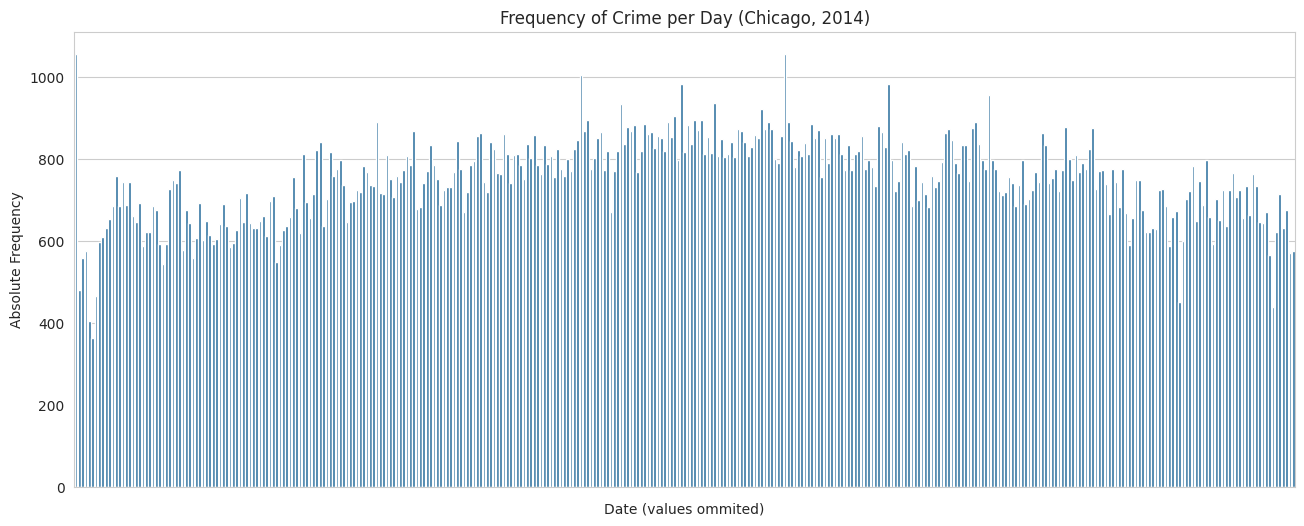

In [ ]:
!pip install --upgrade seaborn
import seaborn as sns
with sns.axes_style('whitegrid'):

  chart = sns.barplot(x='reference_date', y='amount', data=agg_df)
  chart.set(xticklabels=[])
  chart.set( title='Frequency of Crime per Day (Chicago, 2014)', xlabel='Date (values ommited)', ylabel='Absolute Frequency' );
  chart.figure.set_size_inches(w=40/2.54, h=15/2.54)

In [ ]:
# salvando em csv:
df.to_csv('./crime_enriched.csv', sep=',', index=False)

In [ ]:
# Salvando em parquet:
df.to_parquet( './crime', engine='pyarrow', compression='gzip' , partition_cols='reference_date' )

1.4. Crie os recursos no AWS S3 e AWS IAM e persista os dados em seus respectivos *buckets*.

Criando buckets:

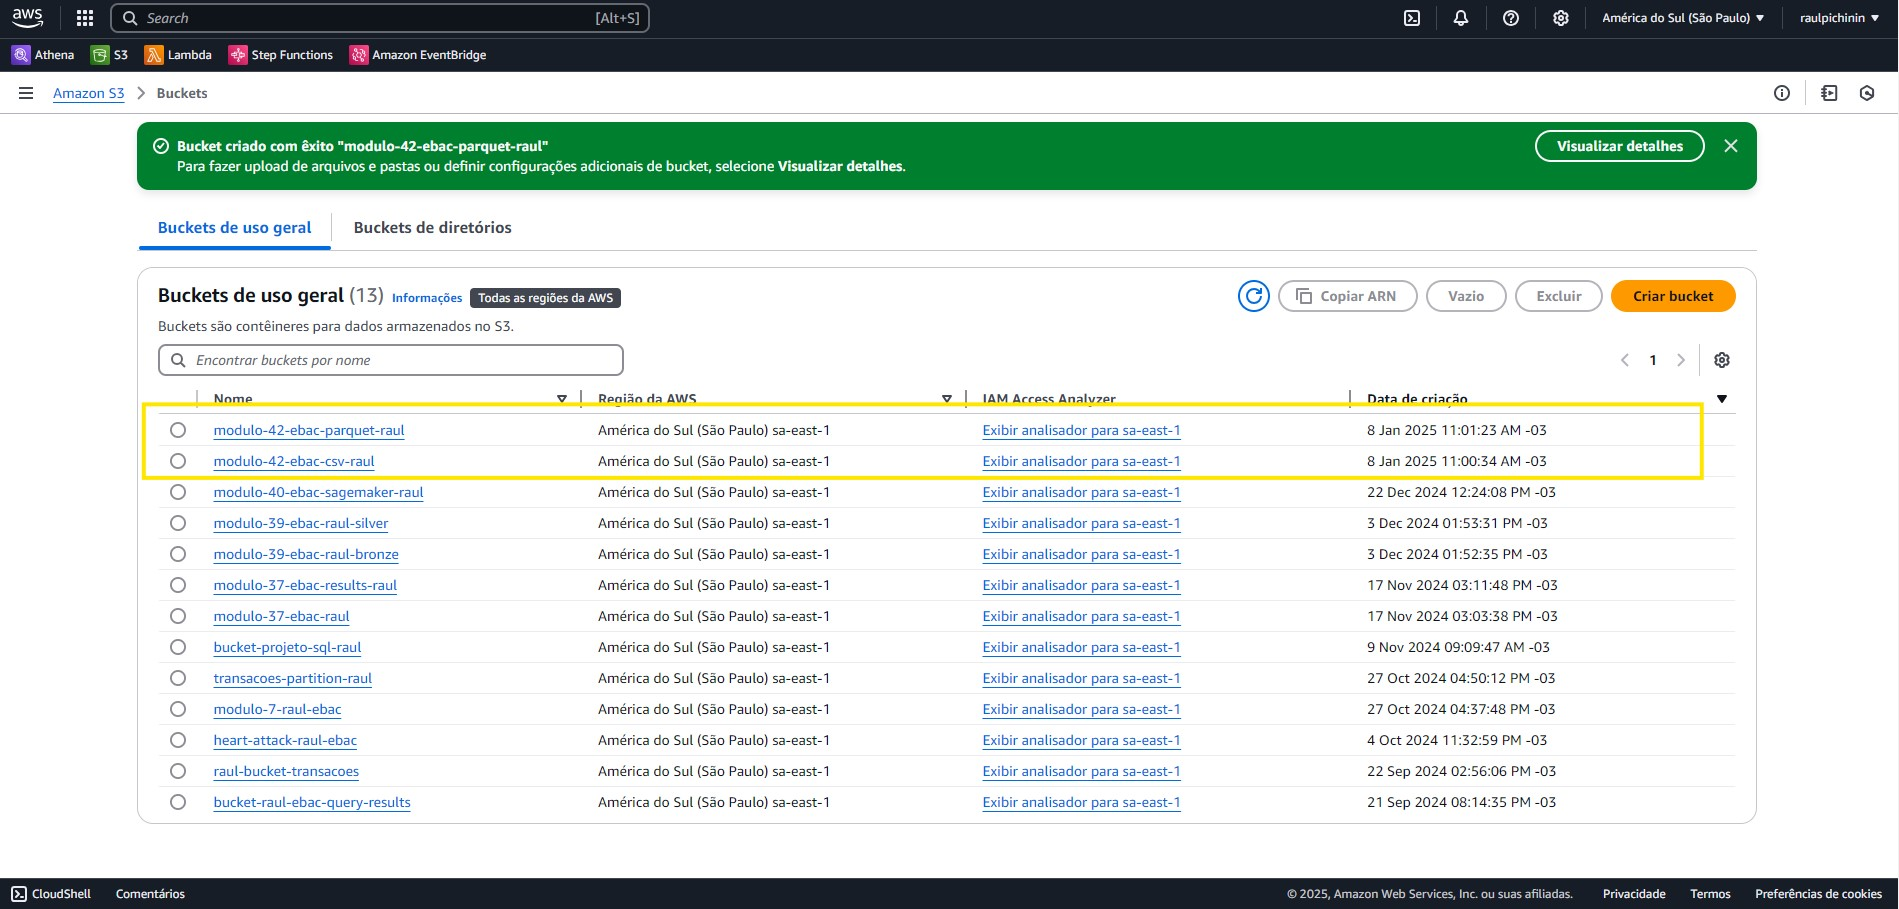

 Criando os recursos tanto para o arquivo no formato csv quanto para os arquivos no formato parquet.
 CSV é feito o download via arquivo normalmente como nos exercícios anteriores.
 No Parquet é criado um usuário programático no IAM para fazer upload das partições na plataforma.

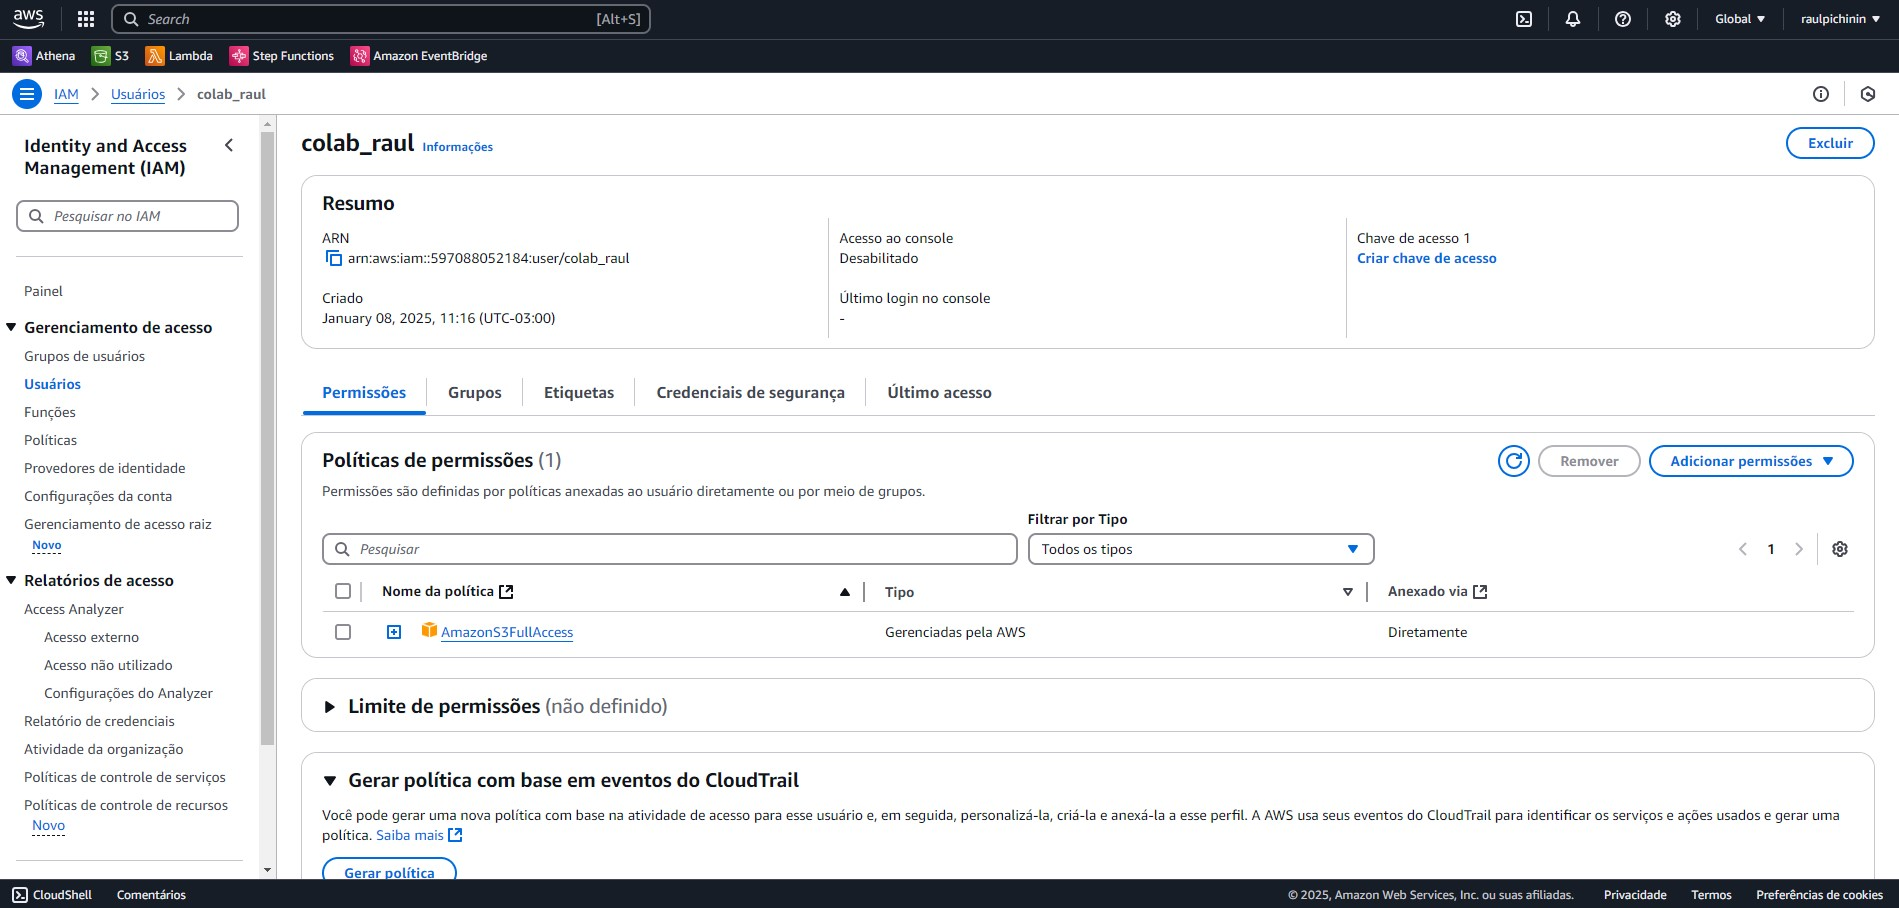

In [ ]:
from getpass import getpass
aws_access_key_id = getpass()

··········


In [ ]:
from getpass import getpass
aws_secret_access_key = getpass()

··········


In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.2 MB/s eta 0:00:00


In [ ]:
import boto3

client = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key )

In [ ]:
import os
BUCKET = 'modulo-42-ebac-parquet-raul'

i = 0

# The for loop should not be indented
for root, dirs, files in os.walk('./crime'):
    elapsed = f'{round(100*i/365, 2)} %'
    print(elapsed)
    for file in files:
        path = os.path.join(root, file)
        bucket_path = '/'.join(path.split(sep='/')[2:])
        client.upload_file(path, BUCKET, bucket_path)
        i = i + 1

0.0 %
0.0 %
0.55 %
1.1 %
1.64 %
2.19 %
2.74 %
3.29 %
3.84 %
4.38 %
4.93 %
5.48 %
6.03 %
6.58 %
7.12 %
7.67 %
8.22 %
8.77 %
9.32 %
9.86 %
10.41 %
10.96 %
11.51 %
12.05 %
12.6 %
13.15 %
13.7 %
14.25 %
14.79 %
15.34 %
15.89 %
16.44 %
16.99 %
17.53 %
18.08 %
18.63 %
19.18 %
19.73 %
20.27 %
20.82 %
21.37 %
21.92 %
22.47 %
23.01 %
23.56 %
24.11 %
24.66 %
25.21 %
25.75 %
26.3 %
26.85 %
27.4 %
27.95 %
28.49 %
29.04 %
29.59 %
30.14 %
30.68 %
31.23 %
31.78 %
32.33 %
32.88 %
33.42 %
33.97 %
34.52 %
35.07 %
35.62 %
36.16 %
36.71 %
37.26 %
37.81 %
38.36 %
38.9 %
39.45 %
40.0 %
40.55 %
41.1 %
41.64 %
42.19 %
42.74 %
43.29 %
43.84 %
44.38 %
44.93 %
45.48 %
46.03 %
46.58 %
47.12 %
47.67 %
48.22 %
48.77 %
49.32 %
49.86 %
50.41 %
50.96 %
51.51 %
52.05 %
52.6 %
53.15 %
53.7 %
54.25 %
54.79 %
55.34 %
55.89 %
56.44 %
56.99 %
57.53 %
58.08 %
58.63 %
59.18 %
59.73 %
60.27 %
60.82 %
61.37 %
61.92 %
62.47 %
63.01 %
63.56 %
64.11 %
64.66 %
65.21 %
65.75 %
66.3 %
66.85 %
67.4 %
67.95 %
68.49 %
69.04 %
69.59 %
70

1.5. Crie os recursos no AWS Athena e execute as consultas SQL da aula.

**CRIANDO CSV:**

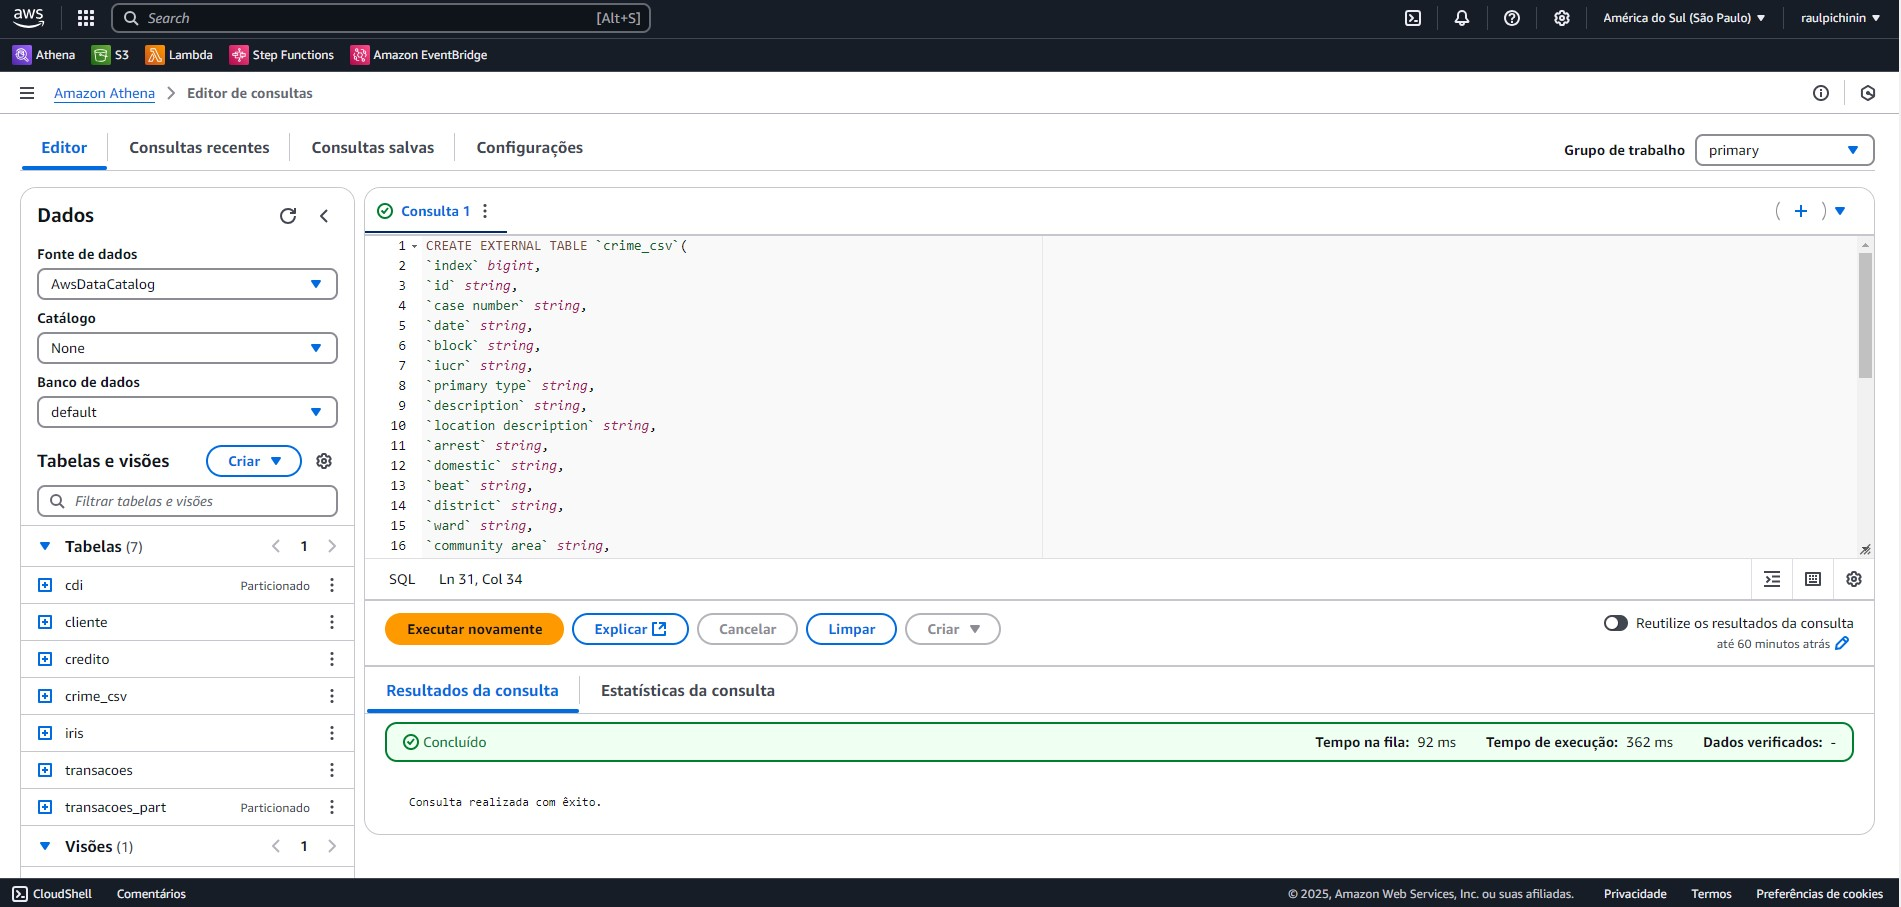

**CONSULTA CSV:**

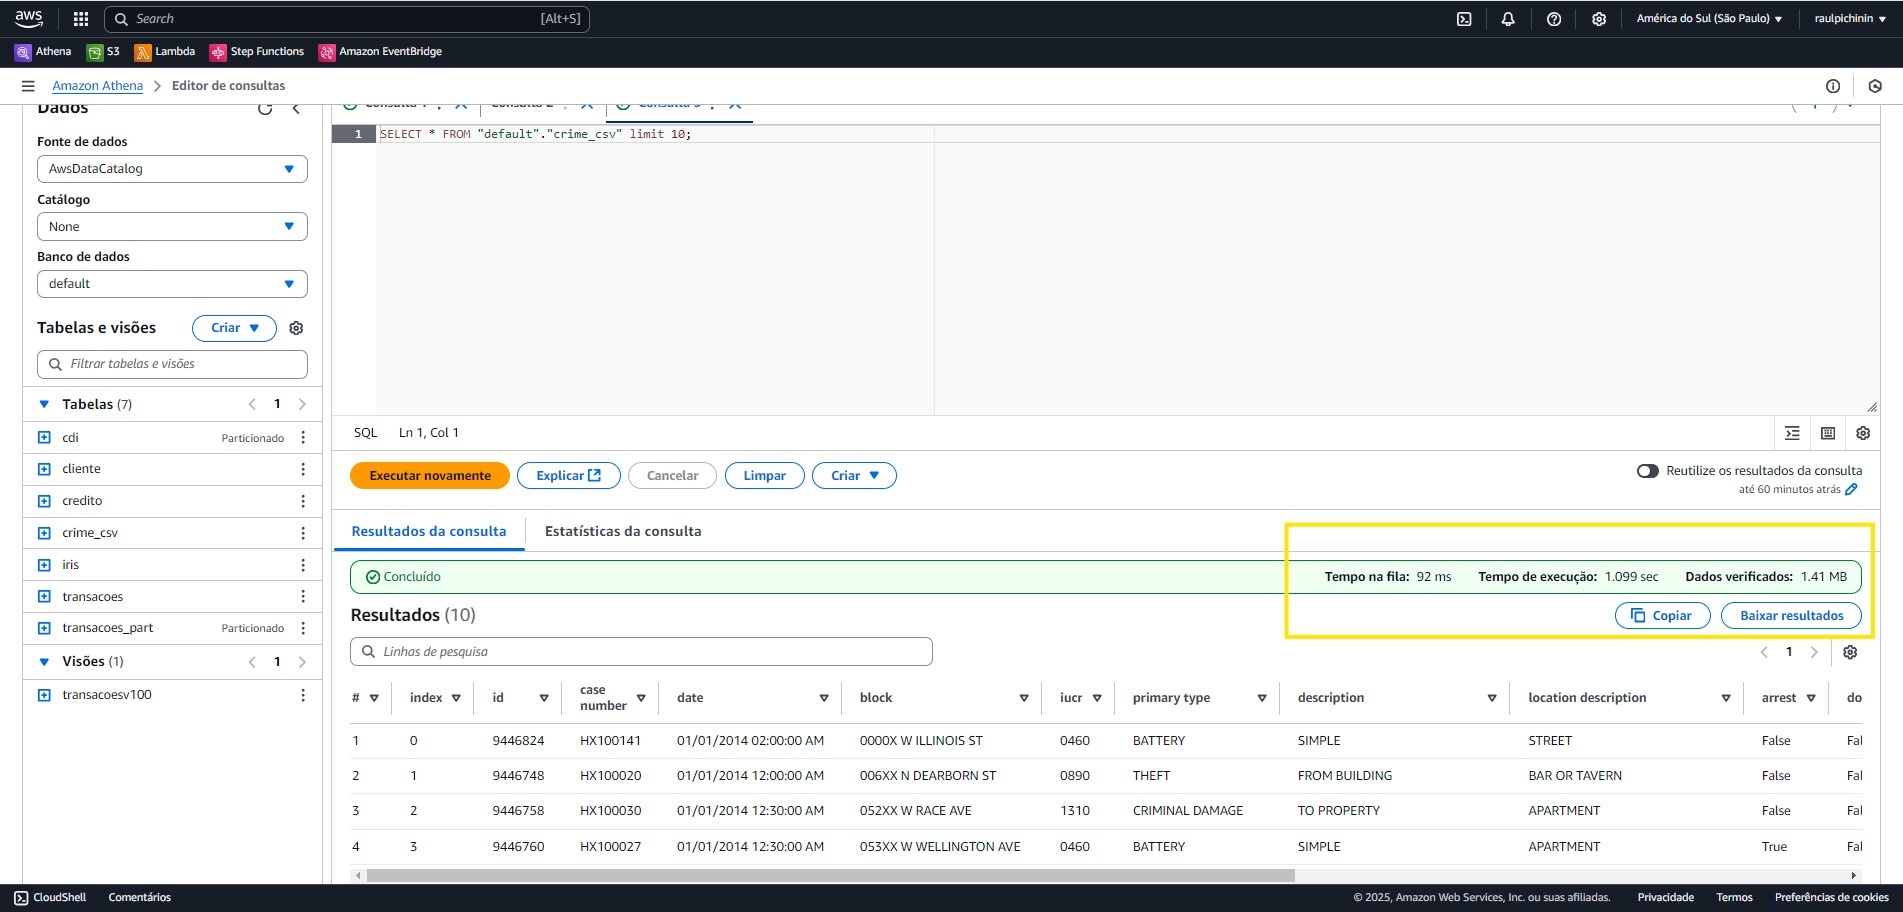

**CRIANDO PARQUET:**

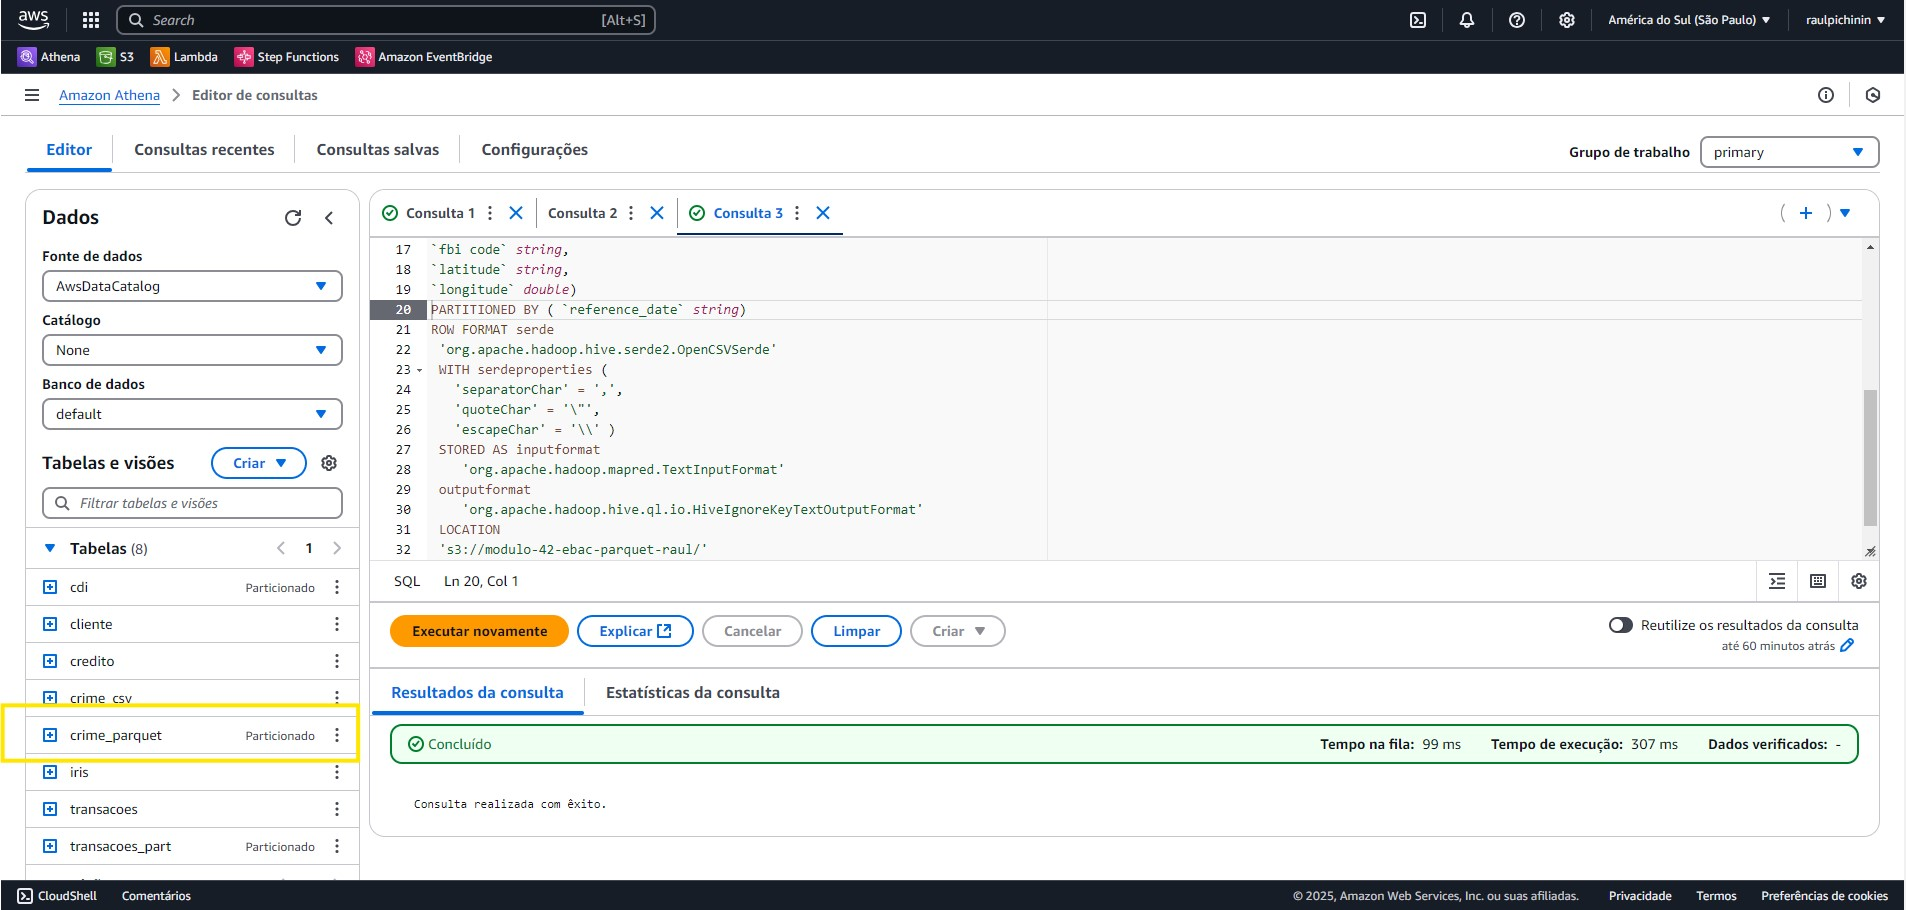

**CARREGANDO PARTIÇÕES PARQUET:**

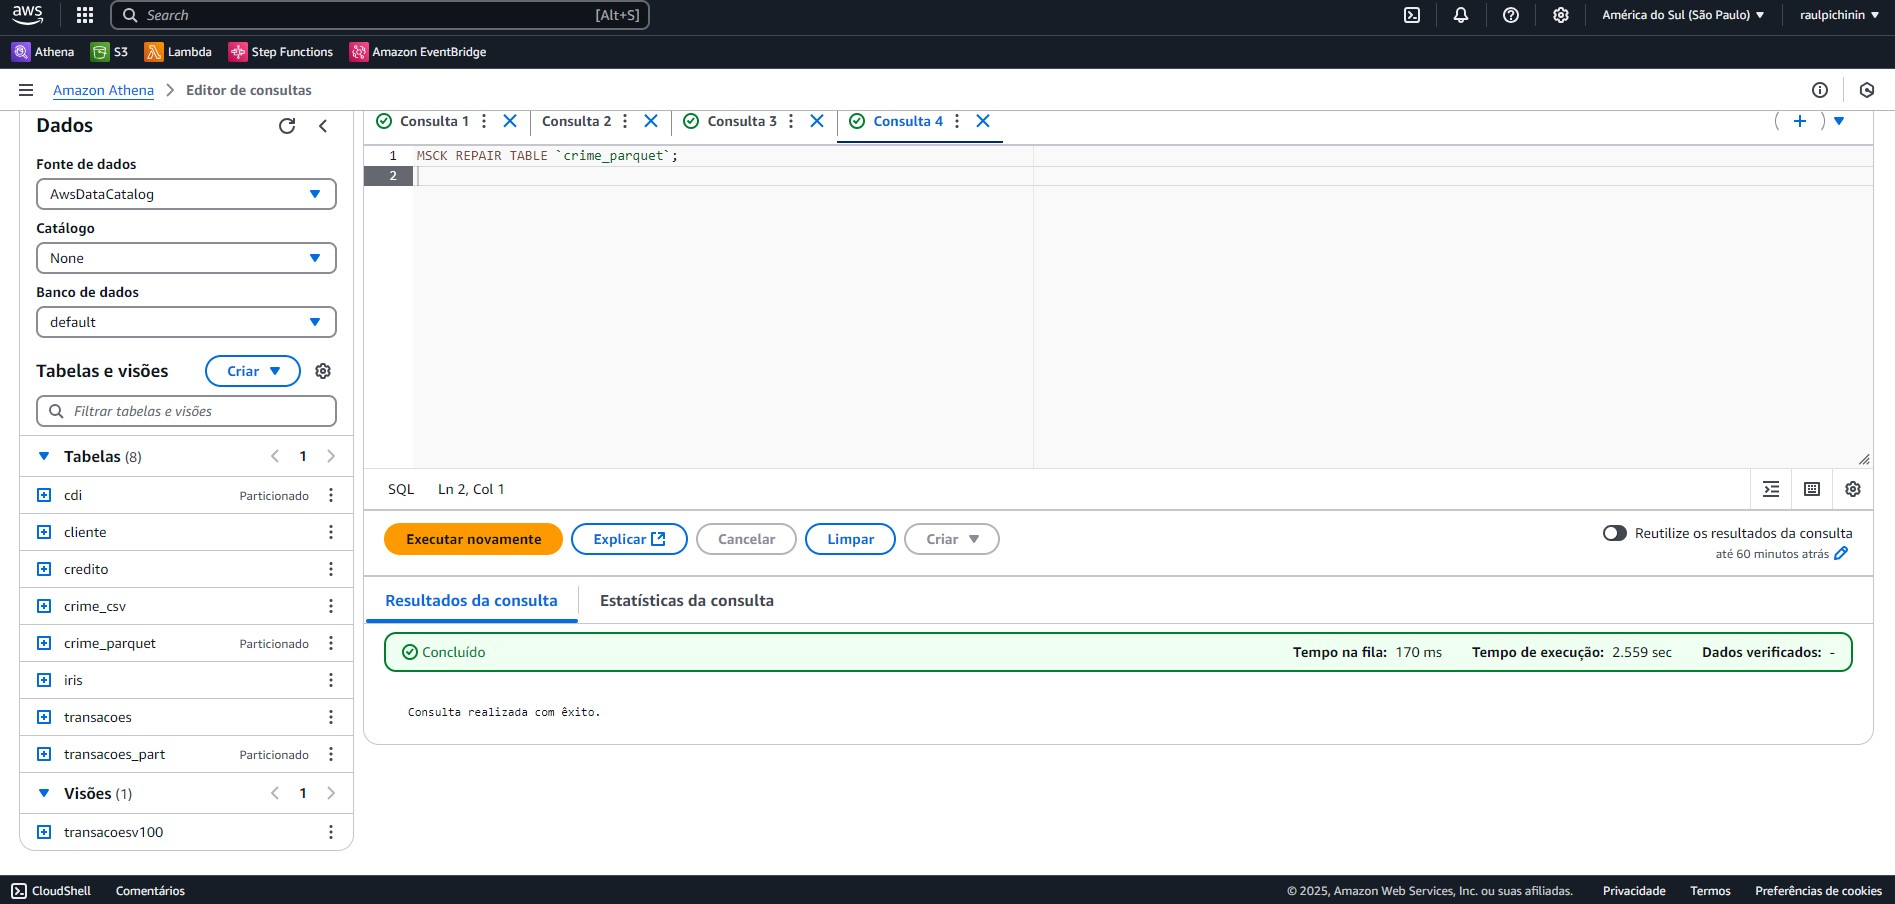

**Q1 CSV**


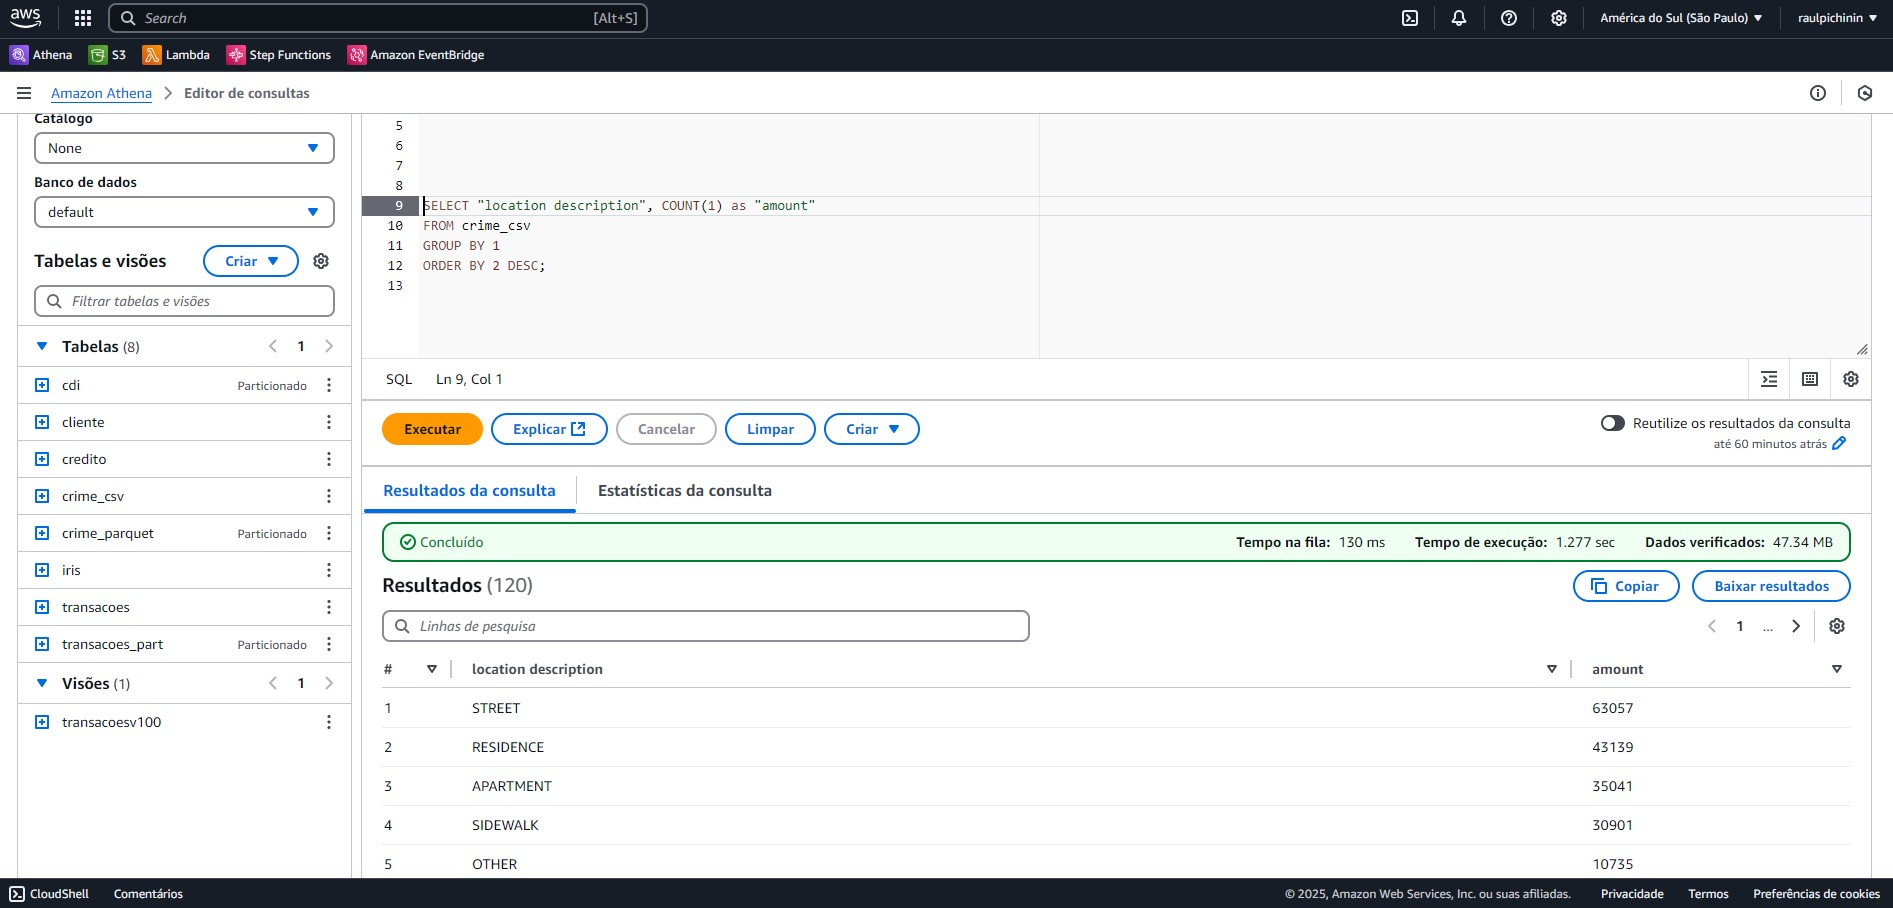

**Q1 PARQUET**

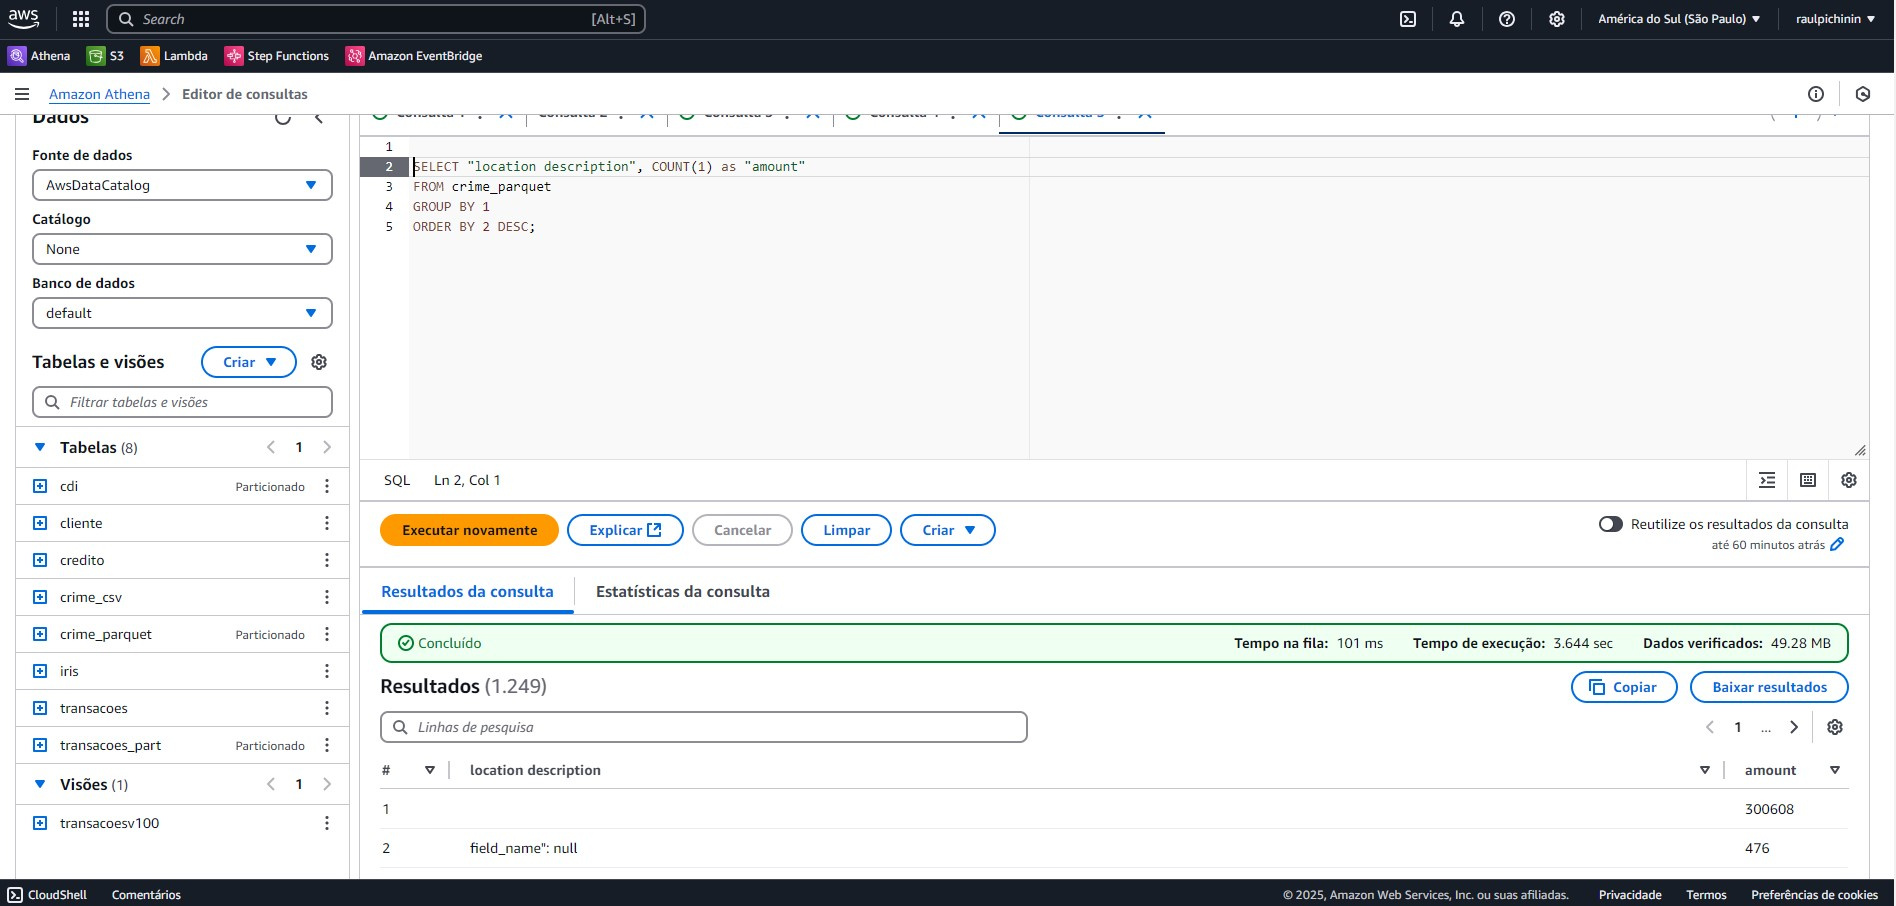

**Q2 CSV**

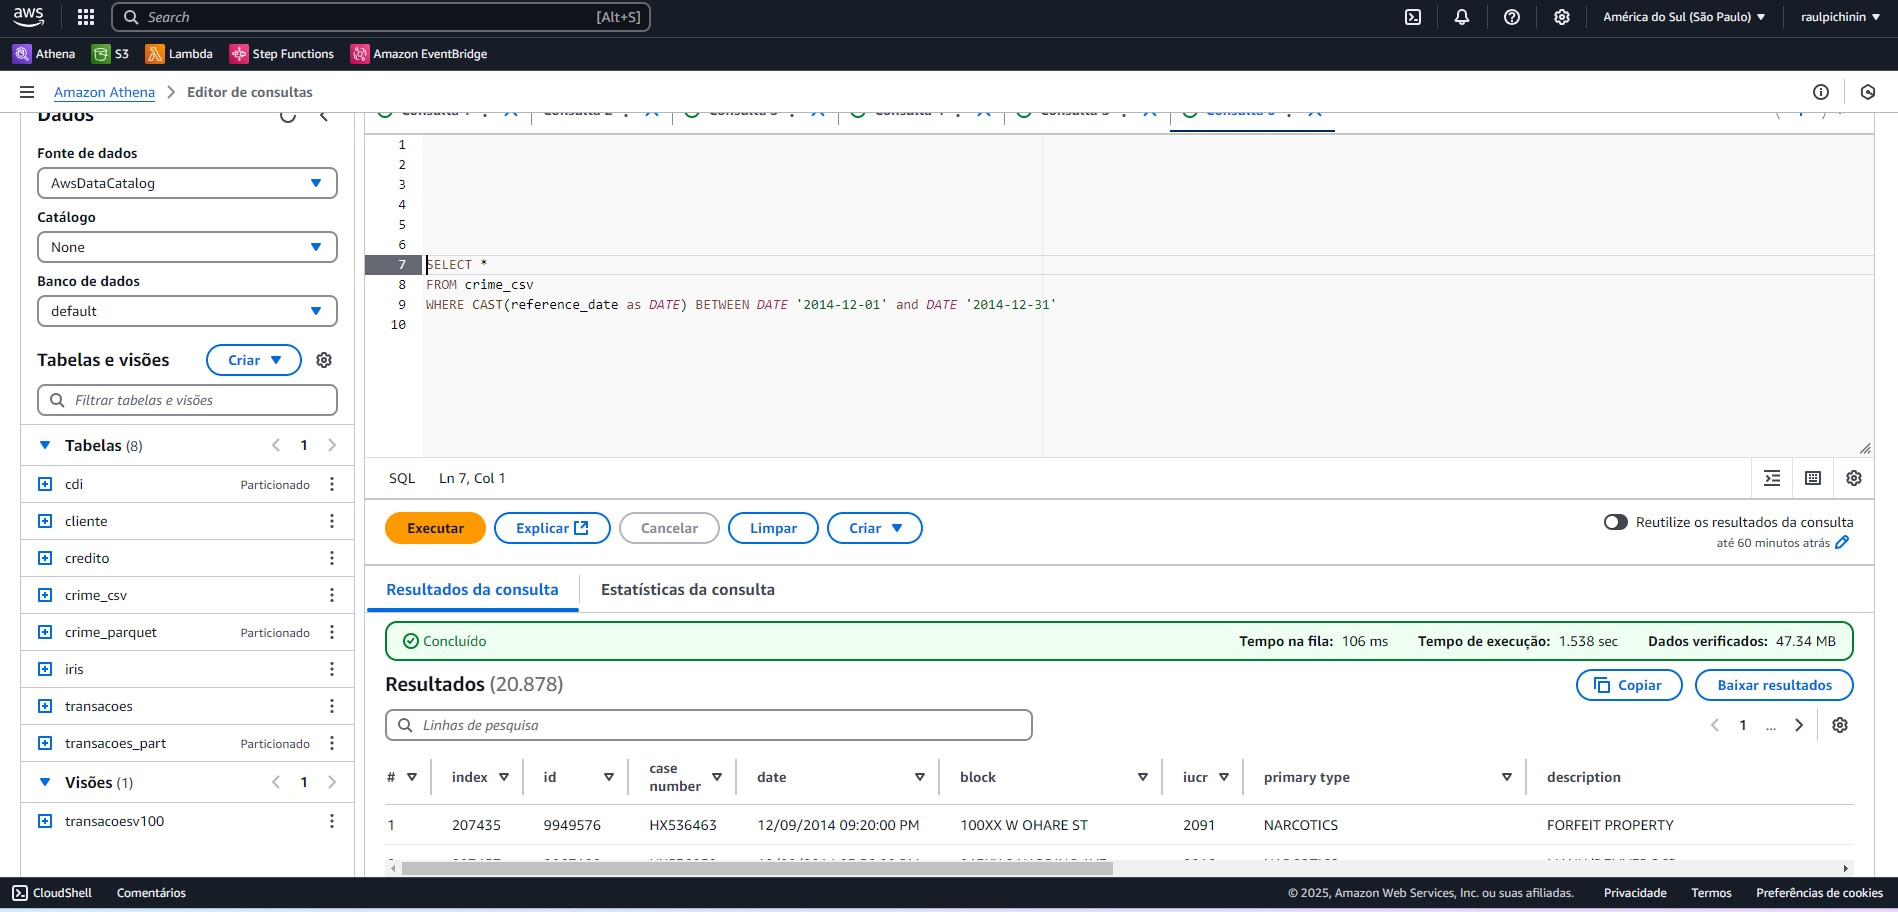

**Q2 PARQUET**

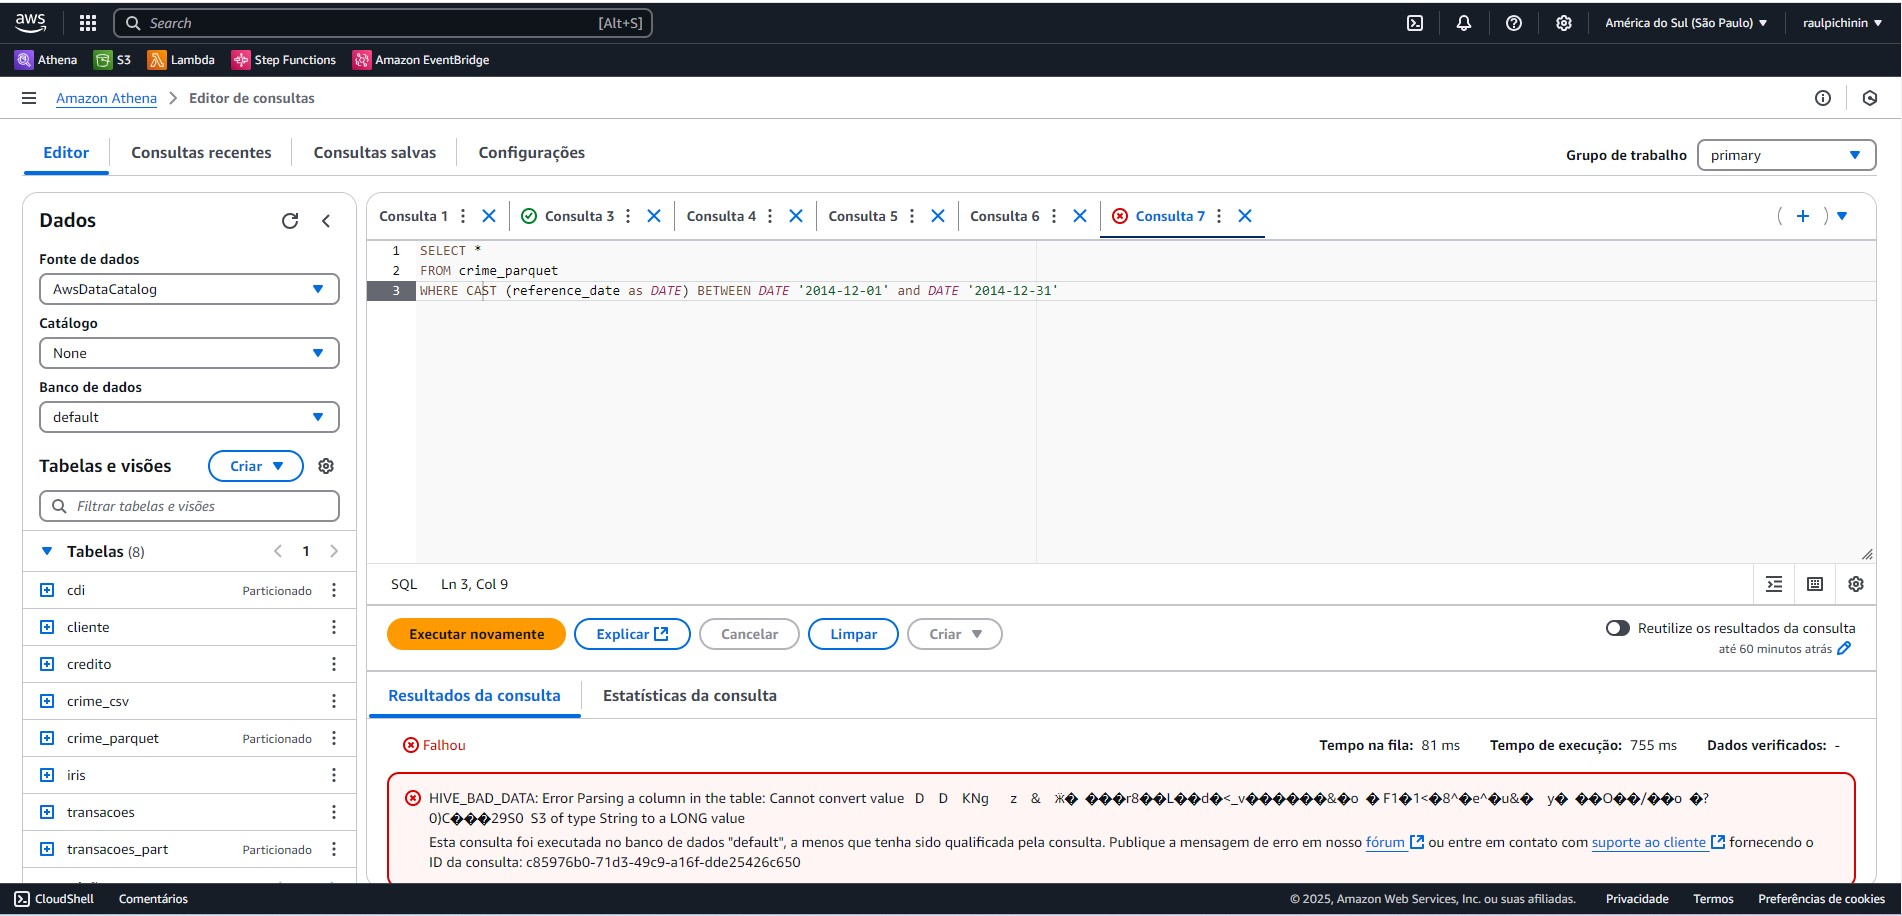

OBS* TIVE UM PROBLEMA AO CARREGAR O PARQUET, POIS APARECE CARACTERS DIVERSOS CONFORME PODE SER VISTO NA PASTA: /content/crime

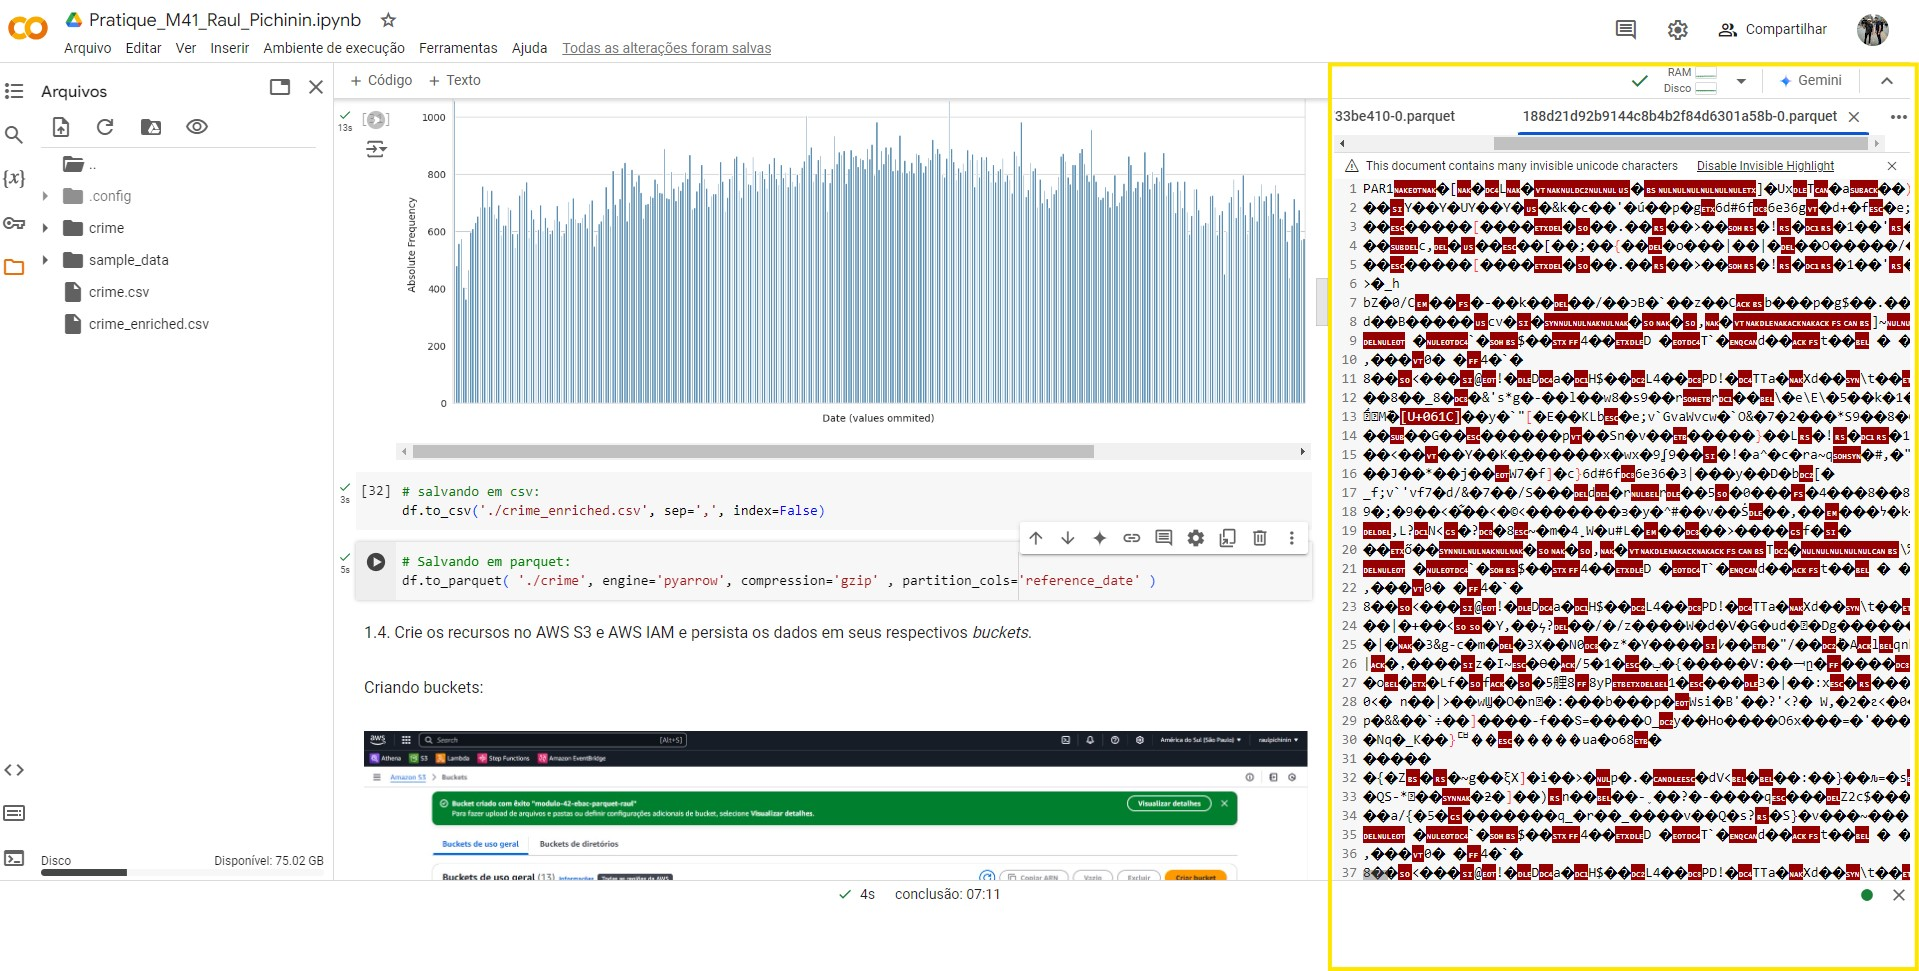

**Q3 CSV**

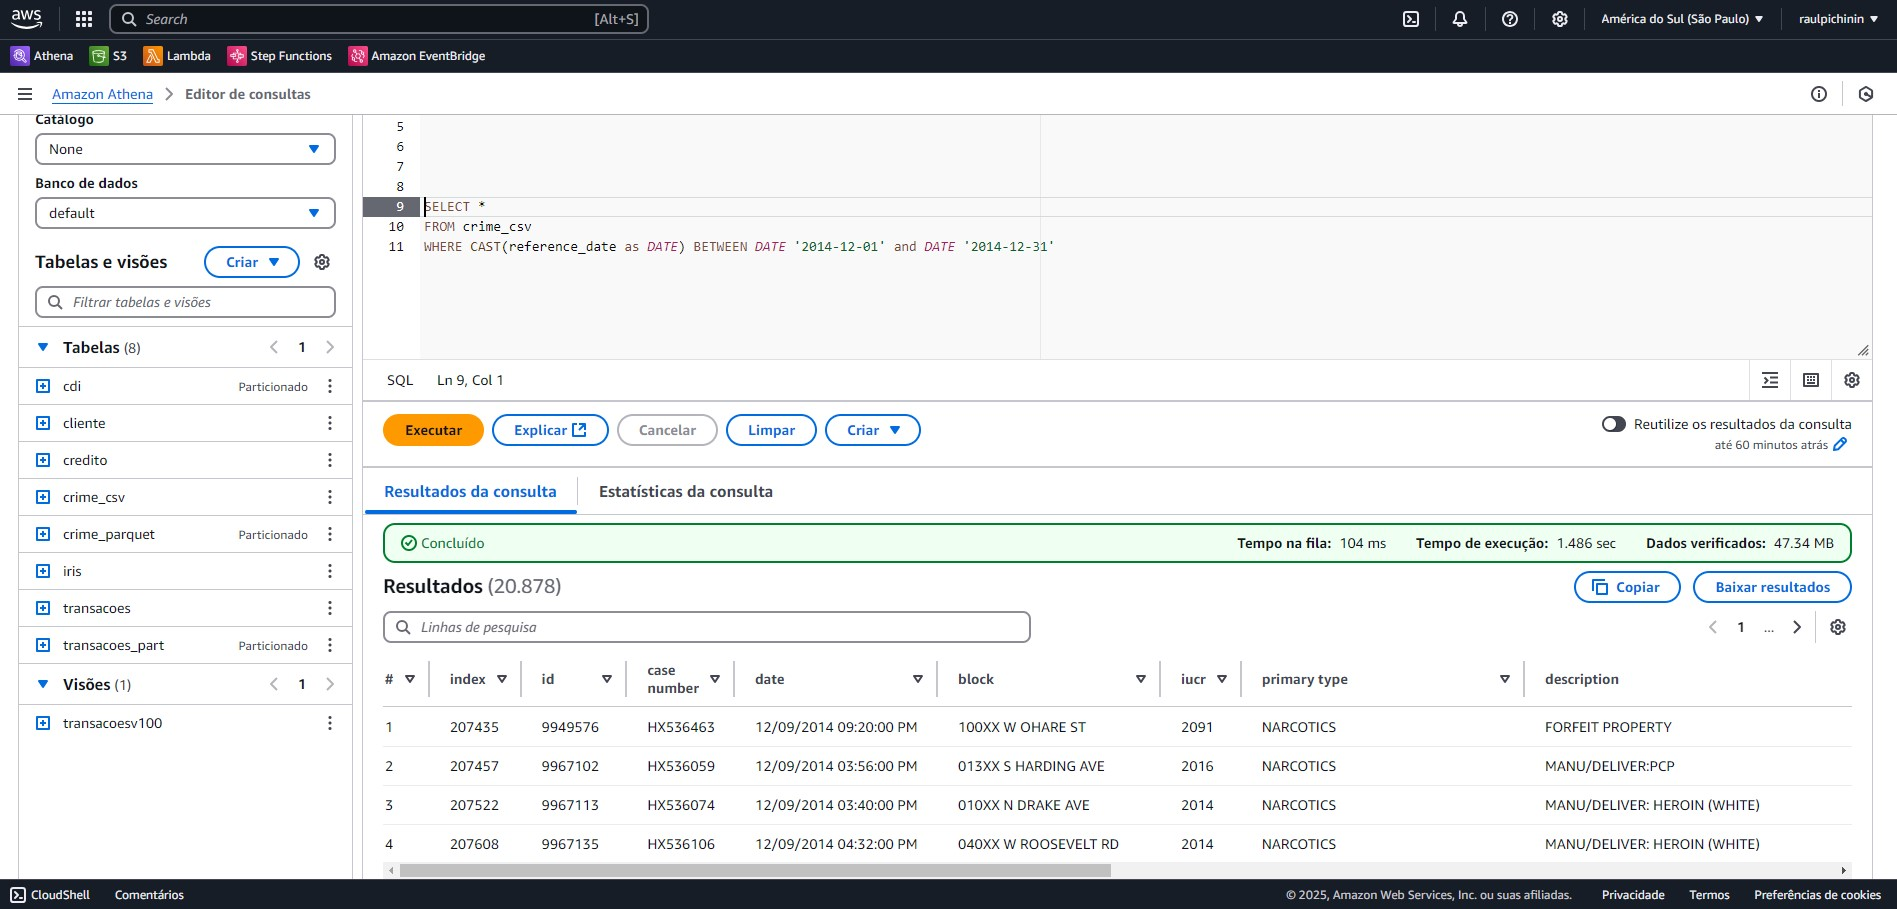

**Q3 - PARQUET**

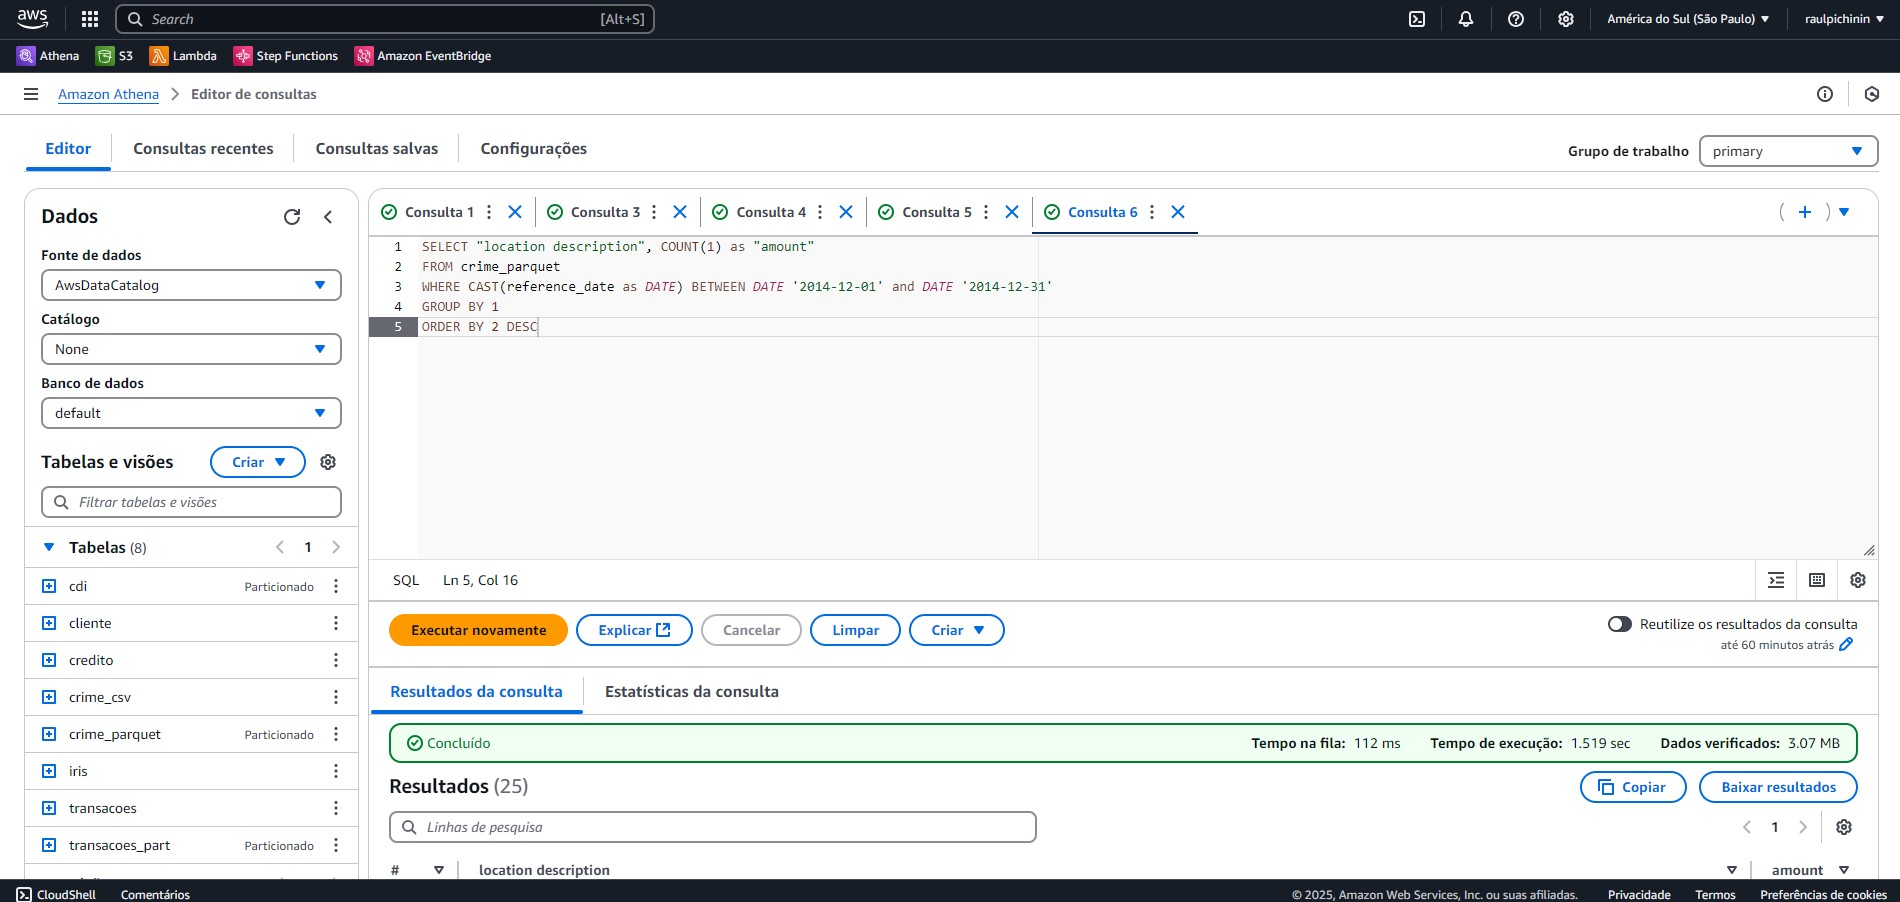